In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the data in a dataframe df
#df = pd.read_csv("C:\\Users\\Harilal\\Desktop\\mini\\senti.xls")
df=pd.read_csv("C:\\Users\\Harilal\\Desktop\\projects\\mini\\senti.xls")

# printing the dataframe 
df.head(10)



,id,sentence,sentiment
0,1,Keh to aese Rahe ho Jaise Pakistan wale Ni kar...,negative
1,4,Anu's Prerna and the way he ran for saving her...,positive
2,17,Shukar hai ye pathan nae warna PTM nay is pr b...,negative
3,18,Harsh pen decision Didn't have much option wit...,positive
4,26,Best luck sir World Cup ke liye bhot bhot subh...,positive
5,27,Yes Great dialogues one Also Chupke Chupke Chh...,positive
6,33,Tu tere baap ke liye jo bola wo kya tha bhadwe...,negative
7,34,I keep saying Kenyan rugby is beautiful save f...,positive
8,38,Desh bhakti baat wahi samajh sakte hai jo khud...,negative
9,41,Madarchod mulle ye mathura Nahi dikha tha jab ...,negative


In [36]:
# drop the unnecessary columns
df.drop('id', axis=1, inplace=True)
df.head(10)

df['sentiment'].value_counts()





positive    5626
negative    4997
Name: sentiment, dtype: int64

In [37]:
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]
df.head()

,sentence,sentiment
0,Keh to aese Rahe ho Jaise Pakistan wale Ni kar...,0
1,Anu's Prerna and the way he ran for saving her...,1
2,Shukar hai ye pathan nae warna PTM nay is pr b...,0
3,Harsh pen decision Didn't have much option wit...,1
4,Best luck sir World Cup ke liye bhot bhot subh...,1


In [38]:
df['sentiment']

0        0
1        1
2        0
3        1
4        1
        ..
10618    1
10619    1
10620    0
10621    1
10622    0
Name: sentiment, Length: 10623, dtype: int64

In [39]:
import re

def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

  return text

# applying the text cleaning function on tweets
df['sentence'] = df['sentence'].apply(text_cleaning)
df.head(10)

    




,sentence,sentiment
0,Keh to aese Rahe ho Jaise Pakistan wale Ni kar...,0
1,Anu's Prerna and the way he ran for saving her...,1
2,Shukar hai ye pathan nae warna PTM nay is pr b...,0
3,Harsh pen decision Didn't have much option wit...,1
4,Best luck sir World Cup ke liye bhot bhot subh...,1
5,Yes Great dialogues one Also Chupke Chupke Chh...,1
6,Tu tere baap ke liye jo bola wo kya tha bhadwe...,0
7,I keep saying Kenyan rugby is beautiful save f...,1
8,Desh bhakti baat wahi samajh sakte hai jo khud...,0
9,Madarchod mulle ye mathura Nahi dikha tha jab ...,0


In [40]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [41]:
def contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }



In [42]:
def emoticons():
    
    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }




In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harilal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [45]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re,string
import emoji
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word) 
        
        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            
            word=re.sub("[0-9]+","",str(word))
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word) 
            if(len(word)!=1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return cleaned_st

df['sentence']=df['sentence'].apply(removal_of_noise)


In [46]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, MaxPool1D, Dropout, SimpleRNN, LSTM, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model




In [47]:
def negation_handler(sentence):	
    temp = int(0)
    for i in range(len(sentence)):
        if sentence[i-1] in ['not',"n't"]:
            antonyms = []
            for syn in wordnet.synsets(sentence[i]):
                syns = wordnet.synsets(sentence[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(sentence[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                        temp = 1 - word1.wup_similarity(word2)
                    if temp>max_dissimilarity:
                        max_dissimilarity = temp
                        antonym_max = ant
                        sentence[i] = antonym_max
                        sentence[i-1] = ''
    return sentence
df['sentence']=df['sentence'].apply(negation_handler)


In [91]:
'''
X = df['sentence']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

def createModel():
    model = keras.Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(256, 5, activation='relu'))
    model.add(layers.MaxPooling1D())
    model.add(LSTM(64, return_sequences=True))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='softmax'))
    return model'''



In [48]:
# splitting the data into training and testing data



# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
X = df['sentence']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# instantiating the tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

# converting tran and test sentences into sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
X_train = pad_sequences(X_train)
T = X_train.shape[1]
print('The length of training sequence is: ', T)

# padding the test sequence
X_test = pad_sequences(X_test, maxlen=T)
print('The length of testing sequence is: ', X_test.shape[1])



The size of datatset vocab is:  21980
The length of training sequence is:  80
The length of testing sequence is:  80


In [49]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
import keras
i = Input (shape=(T, )) 
x=Embedding(28000,32, input_length=100)(i)
x=Conv1D(256, 3, activation='relu', input_shape=(178, 1), padding='same')(x)
x=MaxPool1D(2)(x)
x=Dropout(0.3)(x)
x=Conv1D(128, 3, activation='relu', padding='same')(x)
x=MaxPool1D(2)(x)
x=Dropout(0.2)(x)
x=LSTM(64, return_sequences=True)(x)
x=keras.layers.Bidirectional(keras.layers.LSTM(64))(x)

x=Flatten()(x)
x=Dense(260, activation='relu')(x)
x=Dropout(0.2)(x)

x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)

In [50]:
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val



In [13]:
'''puncList = ["।", "”", "“", "’"]
x = "".join(puncList)
filterString = x + '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n০১২৩৪৫৬৭৮৯'
tokenizer = Tokenizer(filters=filterString, lower=False,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index)+1
maxlen = 800
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)'''
    


In [53]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_metric])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=1, batch_size=16)




532/532 [==============================] - 66s 94ms/step - loss: 0.4277 - f1_metric: 0.8078 - val_loss: 0.3487 - val_f1_metric: 0.8608


In [54]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(X_test,y_test)
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
67/67 [==============================] - 2s 33ms/step - loss: 0.3487 - f1_metric: 0.8646
{'loss': 0.3486964702606201, 'f1_metric': 0.8646203875541687}


In [55]:
mo = keras.Model(inputs = model.inputs, outputs = [model.layers[-2].output])


    
X_train = mo.predict(X_train)
X_test = mo.predict(X_test)


67/67 [==============================] - 2s 31ms/step


In [56]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.to_csv('XTrai.csv', index=False)
X_test.to_csv('XTes.csv', index=False)
y_train.to_csv('yTrai.csv', index=False)
y_test.to_csv('yTes.csv', index=False)

In [57]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import pickle




In [59]:
X_train = pd.read_csv('XTrai.csv')
X_test = pd.read_csv('XTes.csv')
y_train = pd.read_csv('ytrai.csv')
y_test = pd.read_csv('ytes.csv')




----------
RandomForestClassifier


<ipython-input-60-946145b75b5e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


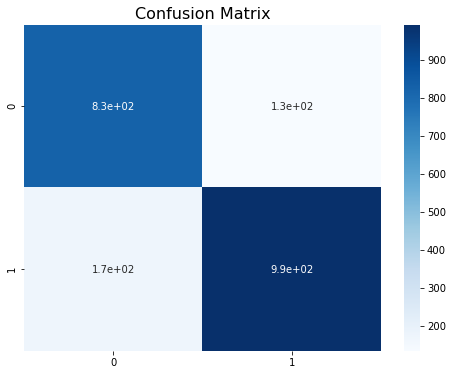

True: {'precision': 0.8809946714031972, 'recall': 0.852233676975945, 'f1-score': 0.8663755458515284, 'support': 1164}
Fake: {'precision': 0.8278278278278278, 'recall': 0.8605619146722164, 'f1-score': 0.8438775510204082, 'support': 961}
Overall: {'Accuracy': 0.856, 'recall': 0.852233676975945, 'f1-score': 0.8663755458515284, 'precision': 0.8809946714031972}


In [60]:
#random forest
print('-'*10)
print('RandomForestClassifier')
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()
report = classification_report(y_test, preds, output_dict=True)
true = report['1']
fake = report['0']
overall = {"Accuracy": accuracy_score(y_test, preds), "recall": recall_score(y_test, preds),
               "f1-score": f1_score(y_test, preds), "precision": precision_score(y_test, preds) }


print("True:", true)
print("Fake:", fake)
print("Overall:", overall)

----------
AdaBoostClassifier


C:\Users\Harilal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


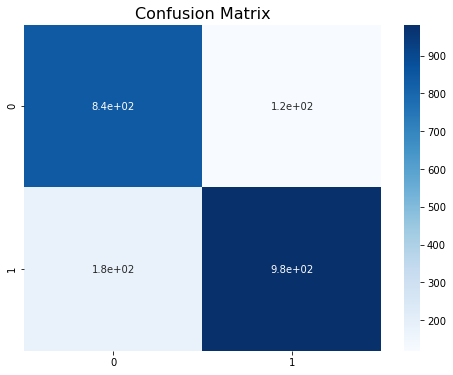

True: {'precision': 0.8919164396003633, 'recall': 0.8436426116838488, 'f1-score': 0.8671081677704194, 'support': 1164}
Fake: {'precision': 0.822265625, 'recall': 0.8761706555671176, 'f1-score': 0.8483627204030227, 'support': 961}
Overall: {'Accuracy': 0.8583529411764705, 'recall': 0.8436426116838488, 'f1-score': 0.8671081677704194, 'precision': 0.8919164396003633}


In [61]:
print('-'*10)
print('AdaBoostClassifier')
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
preds = abc.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()
report = classification_report(y_test, preds, output_dict=True)
true = report['1']
fake = report['0']
overall = {"Accuracy": accuracy_score(y_test, preds), "recall": recall_score(y_test, preds),
               "f1-score": f1_score(y_test, preds), "precision": precision_score(y_test, preds) }



print("True:", true)
print("Fake:", fake)
print("Overall:", overall)

In [62]:
# Predicting the sentiment of any text

def predict_sentiment(text):
    print(text)
  # preprocessing the given text 
    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq, maxlen=T)
  
  # predicting the class
    predicted_sentiment = model.predict(text_pad).round()
  

    if predicted_sentiment == 1.0:
        return('It is a positive sentiment')
    else:
        return('It is a negative sentiment')



# saving the model for future purpose
model.save('sentiment analysis.h5')   # creates HDF5 file for model

In [63]:
text = ['Keh to aese Rahe ho Jaise Pakistan wale Ni karte South Africa se Hara na Bharat to chain ap logon ne bhi Ni Lena']
predict_sentiment(text)

['Keh to aese Rahe ho Jaise Pakistan wale Ni karte South Africa se Hara na Bharat to chain ap logon ne bhi Ni Lena']
1/1 [==============================] - 3s 3s/step


'It is a negative sentiment'

In [64]:
text = ['I love you forever ']
predict_sentiment(text)

['I love you forever ']
1/1 [==============================] - 0s 69ms/step


'It is a positive sentiment'

In [65]:
text = ['Narender modi ji ko pure bhumat se jeet par bhut bhut bdhayi']
predict_sentiment(text)

['Narender modi ji ko pure bhumat se jeet par bhut bhut bdhayi']
1/1 [==============================] - 0s 70ms/step


'It is a positive sentiment'

In [66]:
text = ['what the fuck']
predict_sentiment(text)

['what the fuck']
1/1 [==============================] - 0s 62ms/step


'It is a negative sentiment'

In [30]:
text = ['tum bhut funny ho\n\nmajak krna kha se\nsikha?\n\nMe - Zindagi se']
predict_sentiment(text)

['tum bhut funny ho\n\nmajak krna kha se\nsikha?\n\nMe - Zindagi se']
1/1 [==============================] - 0s 51ms/step


'It is a negative sentiment'